# Importing Required Libraries

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [21]:
df = pd.read_csv('heart_disease.csv')          # Loading the CSV dataset into a DataFrame

In [22]:
df.head()            # Showing the first 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
df.info()       # Displaying column data types & non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
df.describe()         # Showing basic statistics of numerical columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#  Data Preprocessing

# Checking missing values

In [27]:
df.isnull().sum()           # Checking for missing values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#  Dropping duplicates

In [29]:
df.duplicated().sum()         # Checking for duplicate rows in the dataset

723

In [30]:
df.drop_duplicates()               # Dropping duplicated rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# Converting categorical variables into numerical format

In [32]:
df.dtypes    # Checking the data types of all columns

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [33]:
from sklearn.preprocessing import OneHotEncoder         # Importing OneHotEncoder

In [34]:
ohe = OneHotEncoder()

In [35]:
ohe_cols = ['cp', 'restecg', 'slope', 'thal']        

In [36]:
pd.get_dummies(df,columns=ohe_cols,drop_first=True)  # Applying OneHotEncoder

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,False,False,False,True,False,False,True,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,False,False,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,False,False,False,True,False,False,False,False,False,True
3,61,1,148,203,0,161,0,0.0,1,0,False,False,False,True,False,False,True,False,False,True
4,62,0,138,294,1,106,0,1.9,3,0,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,0,1,True,False,False,True,False,False,True,False,True,False
1021,60,1,125,258,0,141,1,2.8,1,0,False,False,False,False,False,True,False,False,False,True
1022,47,1,110,275,0,118,1,1.0,1,0,False,False,False,False,False,True,False,False,True,False
1023,50,0,110,254,0,159,0,0.0,0,1,False,False,False,False,False,False,True,False,True,False


In [37]:
# Now check if binary columns are numeric or not
df[['sex','fbs','exang']].nunique()

sex      2
fbs      2
exang    2
dtype: int64

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#  Feature scaling using 'StandardScaler'

In [40]:
X = df.drop('target',axis=1)
y = df['target']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scale = StandardScaler()

In [44]:
X_train_scaled = scale.fit_transform(X_train)

In [45]:
X_train_scaled

array([[-0.58584022,  0.65465367,  1.008275  , ...,  1.00526437,
         2.17169136, -0.54519316],
       [ 1.05147737, -1.52752523, -0.91672034, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [-0.04006769, -1.52752523,  1.008275  , ...,  1.00526437,
        -0.7254674 , -0.54519316],
       ...,
       [-0.36753121,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [-1.24076726,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [-0.2583767 ,  0.65465367, -0.91672034, ...,  1.00526437,
         0.24025219, -0.54519316]])

In [46]:
X_test_scaled = scale.transform(X_test)

In [47]:
X_test_scaled

array([[ 0.83316836, -1.52752523, -0.91672034, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [-0.1492222 , -1.52752523,  1.008275  , ...,  1.00526437,
        -0.7254674 , -3.85673683],
       [ 0.06908682,  0.65465367, -0.91672034, ..., -0.64007851,
         0.24025219,  1.11057867],
       ...,
       [-1.13161275,  0.65465367,  1.008275  , ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [ 0.72401385,  0.65465367, -0.91672034, ...,  1.00526437,
         0.24025219,  1.11057867],
       [ 0.39655033,  0.65465367,  1.008275  , ..., -0.64007851,
         0.24025219,  1.11057867]])

# Exploratory Data Analysis (EDA):

# Visualizing the relationship between features

C:\Users\asna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

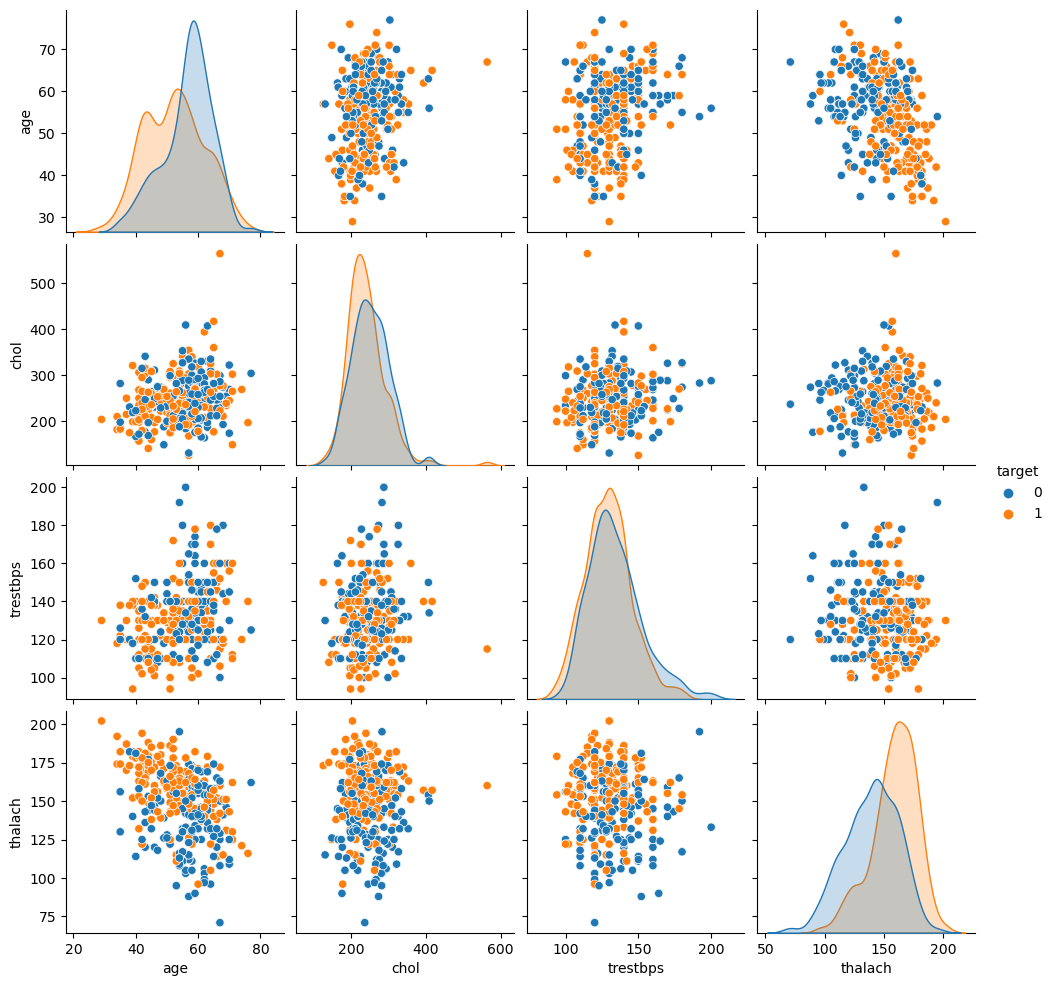

In [50]:
sns.pairplot(df[['age', 'chol', 'trestbps','thalach', 'target']], hue='target')       # visualizing data using pairplot

# Statistical summarization and graphs

In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
df['sex'].value_counts()
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='chol'>

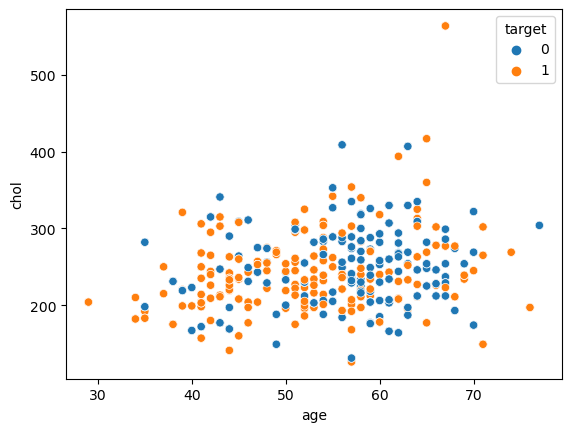

In [55]:
# scatter plot
sns.scatterplot(data=df,x='age',y='chol',hue='target')             # visualizing data using scatterplot

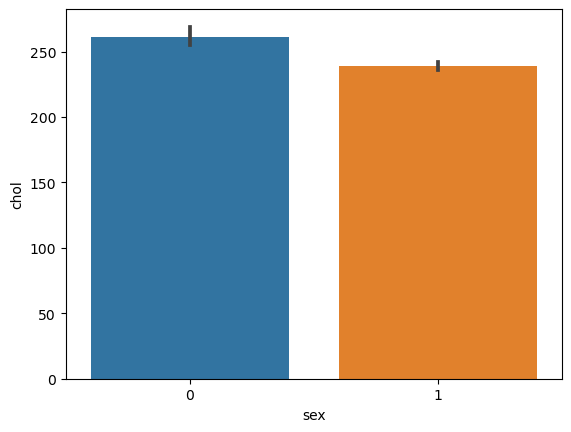

In [56]:
# bar graph
sns.barplot(data=df, x='sex', y='chol')                      # visualizing data using barplot
plt.show()

In [57]:
corr = df.corr()

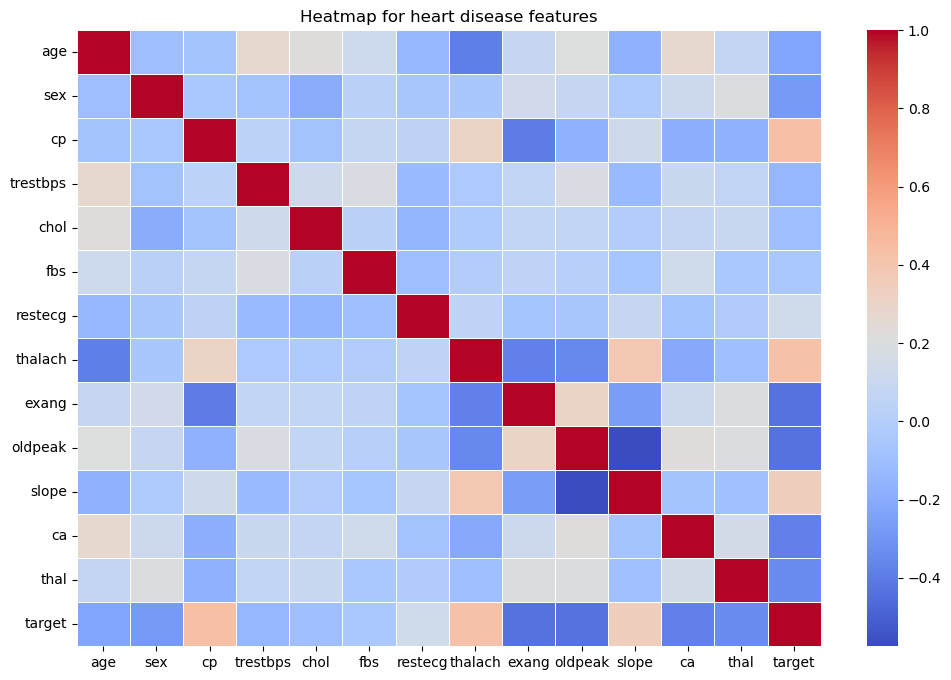

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',linewidth=0.5)
plt.title('Heatmap for heart disease features')                        # Ploting Heatmap
plt.show()

# Feature Selection

In [60]:
corr = df.corr()          # Correlation of data

<Axes: >

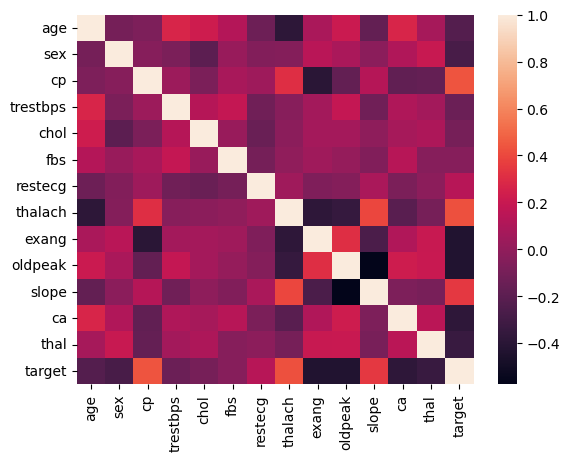

In [61]:
sns.heatmap(corr)

In [62]:
select_features = ['thalach','exang','oldpeak','ca','sex', 'age','target']

In [63]:
df_selected = df[select_features]

# Model Building & Evaluation:

# Training first model  'Logistic Regression'

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [68]:
y_pred = lr.predict(X_test_scaled)           # predicting model 1

In [69]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix               # importing metrcis

In [70]:
print("Accuracy :", accuracy_score(y_test,y_pred))
print("Precision :", precision_score(y_test,y_pred))
print("Recall :", recall_score(y_test,y_pred))
print("F1 :", f1_score(y_test,y_pred))                           # calling & printing all given metrics for model 1
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))

Accuracy : 0.7951219512195122
Precision : 0.7563025210084033
Recall : 0.8737864077669902
F1 : 0.8108108108108109
Confusion Matrix : [[73 29]
 [13 90]]


# Training second model 'Decision Tree Classifier'

In [71]:
# second model
from sklearn.tree import DecisionTreeClassifier              # Importing Model 2

In [72]:
dtc = DecisionTreeClassifier()

In [73]:
dtc.fit(X_train_scaled,y_train)                 # Training model 2

DecisionTreeClassifier()

In [74]:
y_pred1 = dtc.predict(X_test_scaled)          # predicting model 2

In [75]:
print("Accuracy :", accuracy_score(y_test,y_pred1))
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :", recall_score(y_test,y_pred1))                 # calling & printing all given metrics for model 2
print("F1 :", f1_score(y_test,y_pred1))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred1))

Accuracy : 0.9853658536585366
Precision : 1.0
Recall : 0.970873786407767
F1 : 0.9852216748768473
Confusion Matrix : [[102   0]
 [  3 100]]


# Comparing the results of both models

In [77]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test,y_pred),
        accuracy_score(y_test,y_pred1)
    ],
    'Precision': [
        precision_score(y_test,y_pred),
        precision_score(y_test,y_pred1)
    ],                                         # comparing results of both model's
    'Recall': [
        recall_score(y_test,y_pred),
        recall_score(y_test,y_pred1)
    ],
    'F1': [
        f1_score(y_test,y_pred),
        f1_score(y_test,y_pred1)
    ],
    'Confusion Matrix': [
        confusion_matrix(y_test,y_pred),
        confusion_matrix(y_test,y_pred1)
    ]
})
print('Model Comparison:')
print(results)

Model Comparison:
                 Model  Accuracy  Precision    Recall        F1  \
0  Logistic Regression  0.795122   0.756303  0.873786  0.810811   
1        Decision Tree  0.985366   1.000000  0.970874  0.985222   

       Confusion Matrix  
0  [[73, 29], [13, 90]]  
1  [[102, 0], [3, 100]]  


In [78]:
dtc.feature_importances_   # feature importance analysis

array([0.05790124, 0.03229361, 0.27452362, 0.06032227, 0.08694216,
       0.00488296, 0.00732444, 0.06956956, 0.01886571, 0.08717869,
       0.03415405, 0.11890111, 0.14714059])

#  Tuning hyperparameters using GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV         # importing GridSearchCV

In [81]:
# Tuning Hyperparameters for Decision Tree Model
params_grid = {
    'max_depth' : [2,4,6,8,10],                          
    'min_samples_split' : [2,5,10],
    'criterion' : ['gini','entropy']
}

In [82]:
grid = GridSearchCV(dtc,params_grid,cv=5,scoring='f1')

In [83]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [84]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [85]:
best_params = grid.best_params_             # printing best parameters

In [86]:
pred = grid.predict(X_test)

In [87]:
print("Accuracy :", accuracy_score(y_test,pred))
print("Precision :", precision_score(y_test,pred))
print("Recall :", recall_score(y_test,pred))                    # calling & printing all given metrics for GridSearchCV
print("F1 :", f1_score(y_test,pred))
print("Confusion Matrix :", confusion_matrix(y_test,pred))

Accuracy : 0.9853658536585366
Precision : 1.0
Recall : 0.970873786407767
F1 : 0.9852216748768473
Confusion Matrix : [[102   0]
 [  3 100]]
